In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Sangetha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("trainKNN.txt")
df

,A,B,C,D,E,F,G,H,I,J,K
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [3]:
df['K'] = df['K'].astype('int64')

In [4]:
df.dtypes

A      int64
B    float64
C    float64
D    float64
E    float64
F    float64
G    float64
H    float64
I    float64
J    float64
K      int64
dtype: object

In [5]:
df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
dtype: int64

In [6]:
df.drop_duplicates()

,A,B,C,D,E,F,G,H,I,J,K
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [7]:
df.shape

(196, 11)

In [8]:
df = df.drop(["A"], axis=1)

In [9]:
df.head()

,B,C,D,E,F,G,H,I,J,K
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
df.describe()

,B,C,D,E,F,G,H,I,J,K
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


C:\Users\Sangetha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='G'>

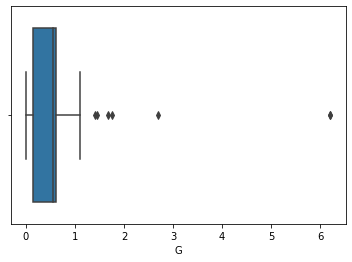

In [11]:
#sns.distplot(df["G"])
sns.boxplot(df["G"])

In [12]:
q25 = df['G'].quantile(0.25)
q75 = df['G'].quantile(0.75)
IQR = q75-q25
print("25th Percentile: ", q25)
print("75th Percentile: ", q75)
print("IQR: ", IQR)

25th Percentile:  0.14
75th Percentile:  0.61
IQR:  0.47


In [13]:
Maxm = q75 + 1.5 * (IQR)
Minm = q25 - 1.5 * (IQR)
print("Maximum Value: ", Maxm)
print("Mininum Value: ", Minm)

Maximum Value:  1.315
Mininum Value:  -0.565


In [14]:
df['G'] = np.where(df['G']>Maxm,Maxm,
              np.where(df['G']<Minm,Minm, df['G']))

C:\Users\Sangetha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='H', ylabel='Density'>

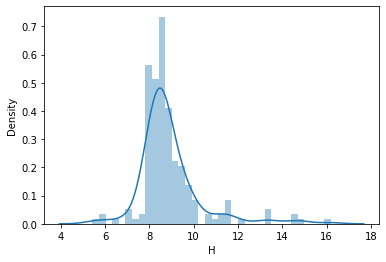

In [15]:
sns.distplot(df["H"])

In [16]:
q25 = df['H'].quantile(0.25)
q75 = df['H'].quantile(0.75)
IQR = q75-q25
print("25th Percentile: ", q25)
print("75th Percentile: ", q75)
print("IQR: ", IQR)

25th Percentile:  8.22
75th Percentile:  9.092500000000001
IQR:  0.8725000000000005


In [17]:
Maxm = q75 + 1.5 * (IQR)
Minm = q25 - 1.5 * (IQR)
print("Maximum Value: ", Maxm)
print("Mininum Value: ", Minm)

Maximum Value:  10.401250000000001
Mininum Value:  6.91125


In [18]:
df['H'] = np.where(df['H']>Maxm,Maxm,
              np.where(df['H']<Minm,Minm, df['H']))

C:\Users\Sangetha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='J', ylabel='Density'>

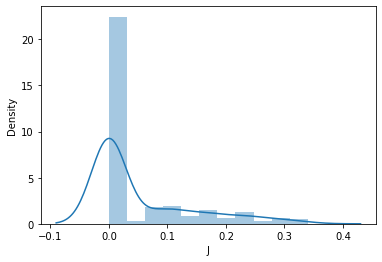

In [19]:
sns.distplot(df["J"])

In [20]:
q25 = df['J'].quantile(0.25)
q75 = df['J'].quantile(0.75)
IQR = q75-q25
print("25th Percentile: ", q25)
print("75th Percentile: ", q75)
print("IQR: ", IQR)

25th Percentile:  0.0
75th Percentile:  0.09
IQR:  0.09


In [21]:
Maxm = q75 + 1.5 * (IQR)
Minm = q25 - 1.5 * (IQR)
print("Maximum Value: ", Maxm)
print("Mininum Value: ", Minm)

Maximum Value:  0.225
Mininum Value:  -0.135


In [22]:
df['J'] = np.where(df['J']>Maxm,Maxm,
              np.where(df['J']<Minm,Minm, df['J']))

In [23]:
df.describe()

,B,C,D,E,F,G,H,I,J,K
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.457015,8.738967,0.164235,0.046786,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.302354,0.811794,0.485198,0.077325,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,6.911250,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,1.315000,10.401250,3.150000,0.225000,7.000000


#### Model

In [35]:
df1 = pd.read_csv("testKNN.txt")
df1

,A,B,C,D,E,F,G,H,I,J,K
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [52]:
x_train = df[['B','C','D','E','F','G','H']].values
x_test = df1[['B','C','D','E','F','G','H']].values
y_train = df['K'].values
y_test = df1['K'].values

x = x_train, x_test
y = y_train, y_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [54]:
classifier.score(x_test,y_test)

0.4444444444444444

In [55]:
y_pred_min= classifier.predict(x_test)

In [56]:
y_pred_min

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 5, 2, 2, 7, 7, 7, 7], dtype=int64)

In [57]:
from sklearn.neighbors import KNeighborsClassifier  
classifier_mann= KNeighborsClassifier(n_neighbors=5, metric='manhattan', p=1)  
classifier_mann.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [58]:
classifier_mann.score(x_test,y_test)

0.5555555555555556

In [59]:
y_pred_mann= classifier_mann.predict(x_test)

In [60]:
y_pred_mann

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 2, 5, 6, 2, 7, 7, 7, 7], dtype=int64)

In [69]:
Diff = pd.DataFrame(y_pred_min, y_pred_mann)
Diff

,0
1,1
1,1
1,1
2,2
1,1
1,1
1,1
1,1
1,1
5,2
